<a href="https://colab.research.google.com/github/Plashka320/Stat_prack_HW_VyuzhaninPD_2025/blob/main/itogovaya_pabota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




#Датасет: New York City Airbnb Open Data (аренда жилья в Нью-Йорке )
[Сам датасет](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?select=New_York_City_.png)

###Цели:


*   Определение факторов, влияющих на стоимость аренды (например, местоположение, тип жилья, доступность удобств)
*    Исследование распределения предложений аренды по районам Нью-Йорка.
*    Выявление наиболее востребованных типов жилья или районов среди арендаторов.
*   Подготовка данных для создания модели прогнозирования цен на аренду.(Как будет вести себя цены в зависимости от района, цены, площади и тд)

В идеале я хочу сделать модель которая по заданным параметрам будет мне выдавать "справедливую цену" на жилье. Например так же как это сделоно на Циан. там есть "Оценка циан" она показывает насколько выше или нирже рынка прожавец уцстановил цену.

###Основные сложности:

*



In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [110]:

df = pd.read_csv("/content/AB_NYC_2019.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [111]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14879,11801984,"Bright, contemporary and best location.",24232061,Tracy,Manhattan,Upper East Side,40.77189,-73.95540,Private room,122.0,9.0,12.0,2018-10-27,0.32,3.0,160.0
14880,11802086,5 rooms in clean apartment /West Harlem,62852828,Latrisha,Manhattan,Harlem,40.82443,-73.95265,Entire home/apt,400.0,3.0,2.0,2018-05-11,0.06,2.0,88.0
14881,11803487,Home 4 Medical Professionals-Brooklyn Hospital,26377263,Stat,Brooklyn,Fort Greene,40.68906,-73.97763,Private room,54.0,30.0,0.0,NaN,NaN,43.0,361.0
14882,11803893,Home 4 Medical Professionals-LIU,26377263,Stat,Brooklyn,Fort Greene,40.69006,-73.98056,Private room,54.0,30.0,0.0,NaN,NaN,43.0,361.0
14883,11804245,Home 4 Medical Professionals-Methodist Hospital,26377263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14884 entries, 0 to 14883
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14884 non-null  int64  
 1   name                            14872 non-null  object 
 2   host_id                         14884 non-null  int64  
 3   host_name                       14871 non-null  object 
 4   neighbourhood_group             14883 non-null  object 
 5   neighbourhood                   14883 non-null  object 
 6   latitude                        14883 non-null  float64
 7   longitude                       14883 non-null  float64
 8   room_type                       14883 non-null  object 
 9   price                           14883 non-null  float64
 10  minimum_nights                  14883 non-null  float64
 11  number_of_reviews               14883 non-null  float64
 12  last_review                     

In [113]:
df.shape
data_columns = df.columns
data_columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [114]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month
count,14883.000000,14883.000000,14883.000000,12428.000000
mean,155.733118,7.485252,39.405832,0.877399
std,247.072148,25.980234,64.194251,1.209976
min,10.000000,1.000000,0.000000,0.010000
25%,75.000000,1.000000,1.000000,0.090000
50%,117.000000,3.000000,10.000000,0.330000
75%,176.000000,5.000000,49.000000,1.202500
max,10000.000000,1250.000000,629.000000,14.580000


**Очистка данных**

In [115]:
duplicates = df.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
14879    False
14880    False
14881    False
14882    False
14883    False
Length: 14884, dtype: bool


In [116]:
df[duplicates]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Нет дубликатов

In [117]:
 df.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14879,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14880,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14881,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
14882,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [118]:
missing_values_count = df.isna().sum()
print(missing_values_count)

id                                   0
name                                12
host_id                              0
host_name                           13
neighbourhood_group                  1
neighbourhood                        1
latitude                             1
longitude                            1
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       2456
reviews_per_month                 2456
calculated_host_listings_count       1
availability_365                     1
dtype: int64


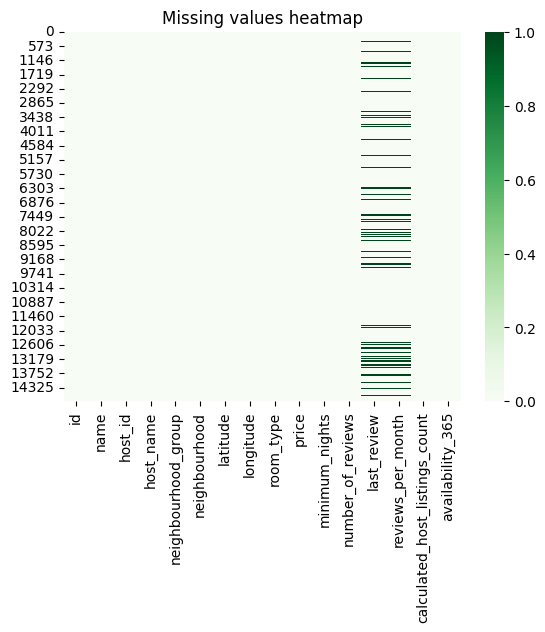

In [119]:
sns.heatmap(df.isnull(), cmap = 'Greens')
plt.title('Missing values heatmap')
plt.show()

В столбцах last_review, reviews_per_month много пропущенных жанных.  

Строк, в которых пропушено значение last_review много. Поэтому будет ошибкой удалить все строки не содержащие данных last_review. Можно заменить, например, на самую раннюю дату. Или указать не существующую дате eg 1900-01-01. Я просто удалю этот стоблец. для предсказания цены он нее важен.

In [120]:
df.drop('last_review', axis=1, inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0.0


Посмотрим на колонку reviews_per_month

In [121]:
df[df['reviews_per_month'].isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,1.0,365.0
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190.0,7.0,0.0,NaN,2.0,249.0
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80.0,4.0,0.0,NaN,1.0,0.0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35.0,60.0,0.0,NaN,1.0,365.0
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150.0,1.0,0.0,NaN,1.0,365.0


Столбец reviews_per_month и number_of_reviews = 0. Могут быть зависимы. ТО есть когда reviews_per_month = NaN то number_of_reviews = 0. Проверим эту г ипотезу

In [123]:
num_missing_reviews = df['reviews_per_month'].isnull().sum()
num_reviews_zero = np.sum(df['number_of_reviews']==0)
print(num_missing_reviews == num_reviews_zero)

False


Гипотеза подтвердилась. Заполняем reviews_per_month нулями.

In [124]:
df['reviews_per_month'].fillna(0, inplace = True)
df[df['reviews_per_month'].isnull()]

<ipython-input-124-d7e493f78baf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace = True)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [125]:
df[df['availability_365'] == 0]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0.0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,0.40,1.0,0.0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,0.99,1.0,0.0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120.0,90.0,27.0,0.22,1.0,0.0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299.0,3.0,9.0,0.07,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14872,11793542,Room in Apt. near Columbia w/ Views,26271616,Ian,Manhattan,Upper West Side,40.80109,-73.96128,Private room,96.0,1.0,0.0,0.00,2.0,0.0
14873,11796761,LRG Sunny One Bedroom Garden APT w/ Big Backyard.,1039519,Brian,Brooklyn,Bedford-Stuyvesant,40.68407,-73.95310,Entire home/apt,165.0,4.0,5.0,0.13,1.0,0.0
14874,11798782,Private Bedroom & Bath- Brooklyn,26865924,Donminique,Brooklyn,Crown Heights,40.67228,-73.93569,Private room,65.0,1.0,1.0,0.03,1.0,0.0
14876,11800108,"Clean, comfortable and convenient UES Studio",28551360,Kate,Manhattan,Upper East Side,40.78226,-73.95332,Entire home/apt,120.0,1.0,11.0,0.30,1.0,0.0


Заменяем нули в столбце availability_365 на среднее значение.

In [126]:
mean_availability = df['availability_365'].mean()
df.loc[df['availability_365'] == 0, 'availability_365'] = mean_availability
df[df['availability_365'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


Корреляционный аналз

In [127]:
df_corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
df_corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.026195,-0.047376,-0.050176,0.011943,0.033527
minimum_nights,0.026195,1.000000,-0.067778,-0.074888,0.133694,0.115852
number_of_reviews,-0.047376,-0.067778,1.000000,0.916345,-0.060076,0.184382
reviews_per_month,-0.050176,-0.074888,0.916345,1.000000,-0.058866,0.156348
calculated_host_listings_count,0.011943,0.133694,-0.060076,-0.058866,1.000000,0.221967
availability_365,0.033527,0.115852,0.184382,0.156348,0.221967,1.000000


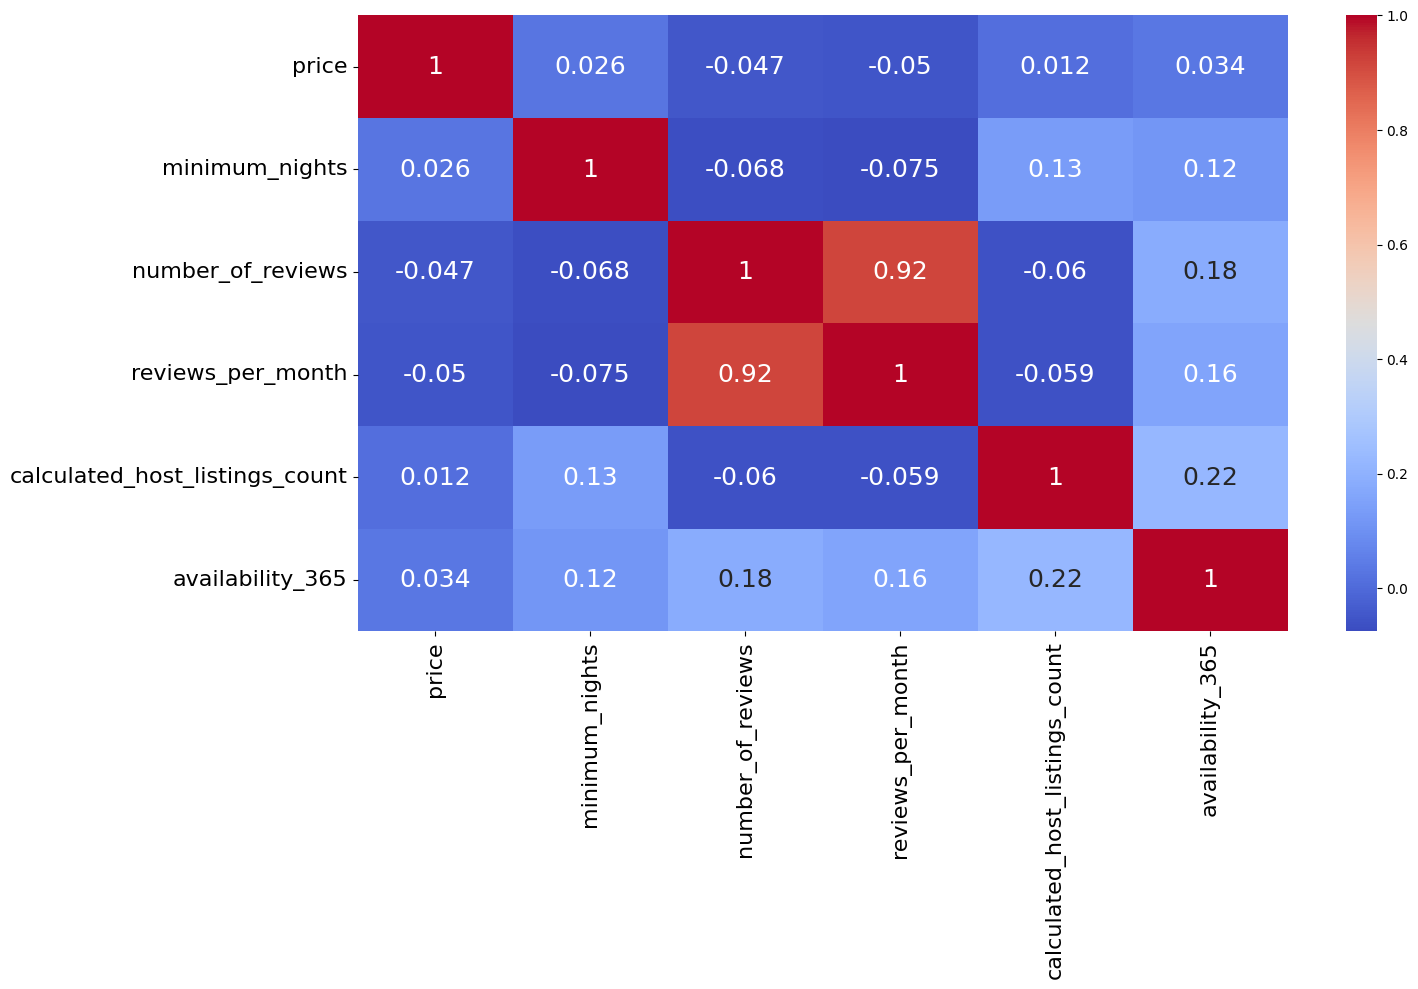

In [128]:
plt.subplots(figsize = (15,8), dpi = 100)
sns.heatmap(df_corr, annot = True, cmap = 'coolwarm', annot_kws={'size': 18})
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()


**Зависимости**

TypeError: 'value' must be an instance of str or bytes, not a float

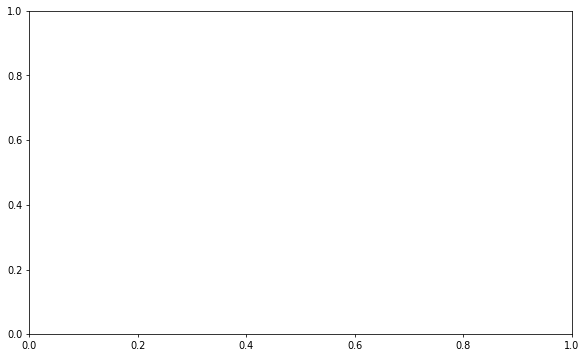

In [130]:
plt.figure(figsize=(10, 6), dpi=70)
plt.bar(df['neighbourhood_group'].unique(), df['neighbourhood_group'].value_counts())
plt.title('Обьявления по районам')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

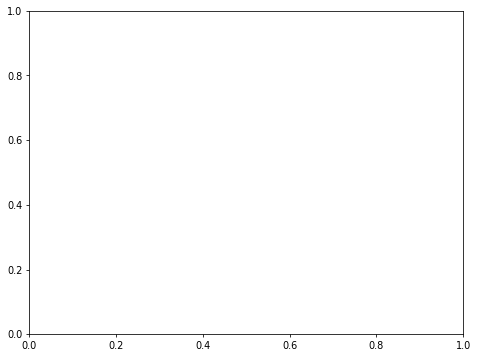

In [24]:

plt.figure(figsize=(8, 6), dpi=70)
plt.scatter(df["neighbourhood_group"], df["price"])
plt.title("Цена в зависимости от района")
plt.xlabel("Neighbourhood Groups")
plt.ylabel("Price")
plt.grid(True)
plt.show()

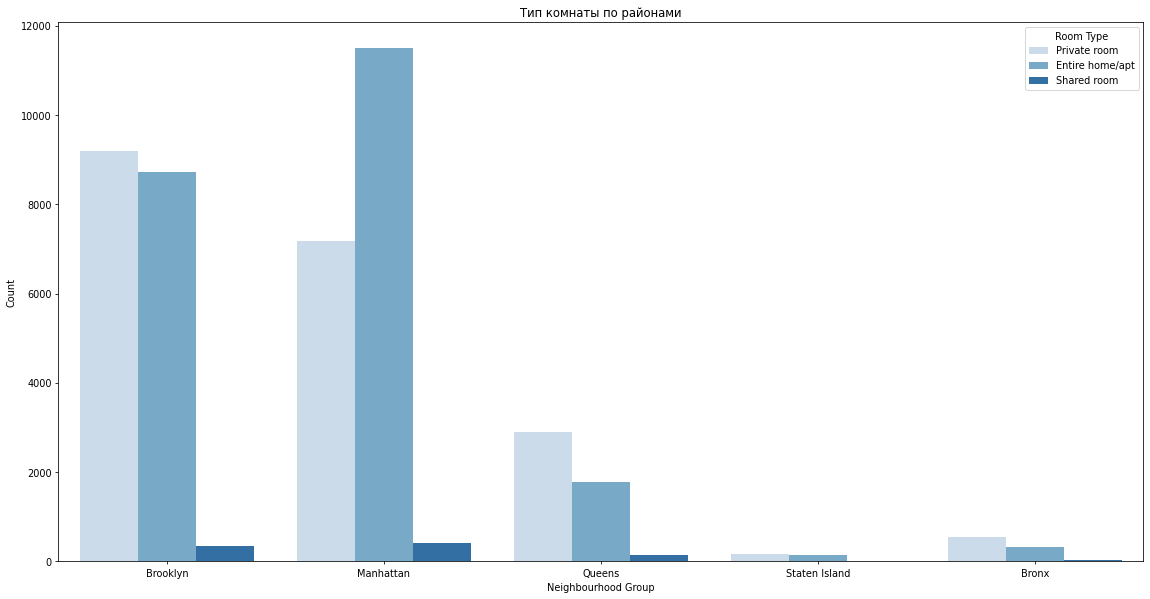

In [23]:
plt.figure(figsize=(20, 10), dpi=70)
sns.countplot(x='neighbourhood_group', hue='room_type', data=df, palette='Blues')
plt.title('Тип комнаты по районами')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.legend(title='Room Type', loc='upper right')
plt.show()

<ipython-input-53-ee2586681769>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood_group', y='availability_365', data=df, palette='Blues')


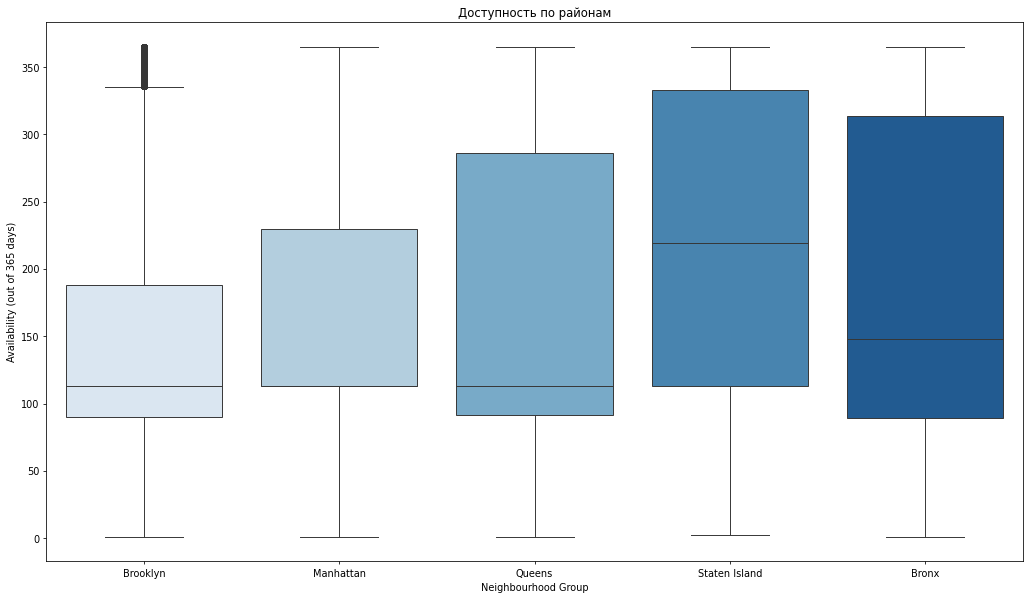

In [ ]:

plt.figure(figsize=(18, 10), dpi=70)
sns.boxplot(x='neighbourhood_group', y='availability_365', data=df, palette='Blues')
plt.title('Доступность по районам')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Availability (out of 365 days)')
plt.show()

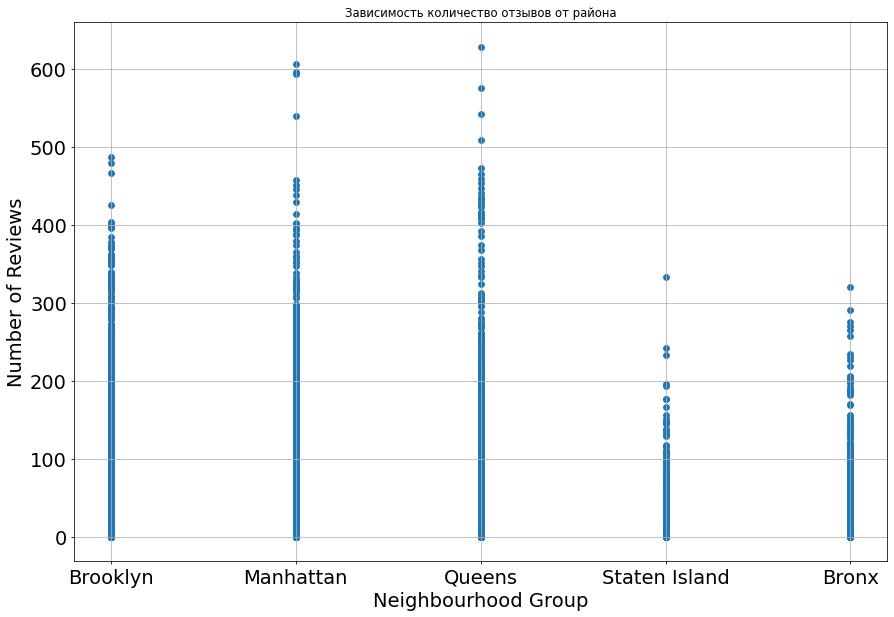

In [ ]:
plt.figure(figsize=(15, 10), dpi=70)
plt.scatter(df["neighbourhood_group"], df["number_of_reviews"])
plt.title('Зависимость количество отзывов от района')
plt.xlabel('Neighbourhood Group', fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Number of Reviews', fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(True)
plt.show()

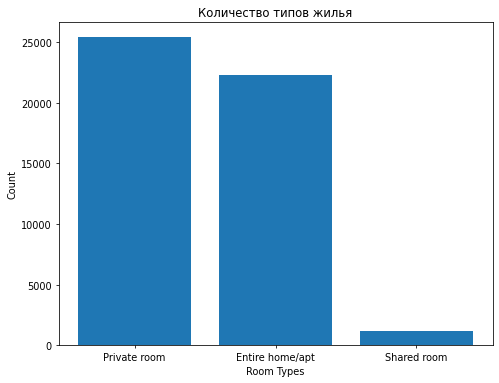

In [ ]:
plt.figure(figsize=(8, 6), dpi=70)
plt.bar(df['room_type'].unique(), df['room_type'].value_counts())
plt.title('Количество типов жилья')
plt.xlabel('Room Types')
plt.ylabel('Count')
plt.show()

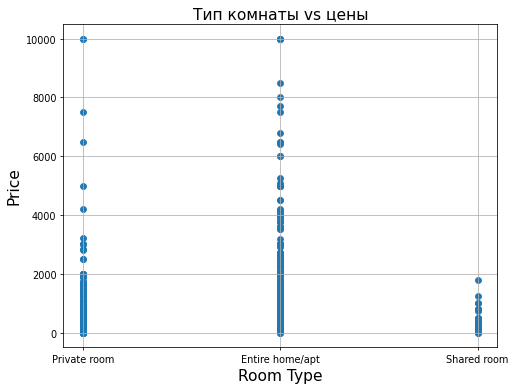

In [ ]:
plt.figure(figsize=(8, 6), dpi=70)
plt.scatter(df['room_type'], df['price'])
plt.title('Тип комнаты vs цены', fontsize = 16)
plt.xlabel('Room Type', fontsize = 16)
plt.ylabel('Price', fontsize = 16)
plt.grid(True)
plt.show()

<ipython-input-72-f2621ad2b04c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='availability_365', data=df, palette='Blues')


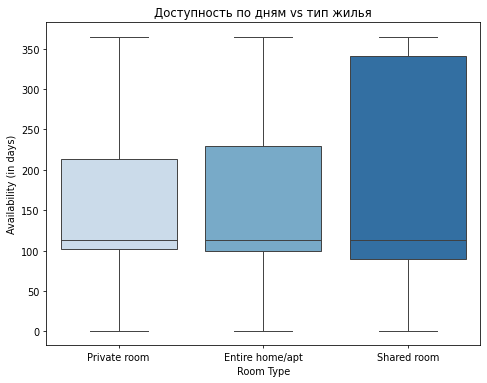

In [ ]:
plt.figure(figsize=(8, 6), dpi=70)
sns.boxplot(x='room_type', y='availability_365', data=df, palette='Blues')
plt.title('Доступность по дням vs тип жилья')
plt.xlabel('Room Type')
plt.ylabel('Availability (in days)')
plt.show()

Подготовка даннях дл мл

In [55]:
colums_to_drop = ['id', 'name', 'host_id', 'neighbourhood', 'host_name', 'latitude',	'longitude', 'number_of_reviews',	'reviews_per_month']
df.drop(columns = colums_to_drop, inplace = True)
df.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149.0,1.0,6.0,365.000000
1,Manhattan,Entire home/apt,225.0,1.0,2.0,355.000000
2,Manhattan,Private room,150.0,3.0,1.0,365.000000
3,Brooklyn,Entire home/apt,89.0,1.0,1.0,194.000000
4,Manhattan,Entire home/apt,80.0,10.0,1.0,107.324531


**Делаем стандартизацию данных**

In [57]:
numerical_columns = ['minimum_nights', 'calculated_host_listings_count', 'availability_365']
other_columns = ['neighbourhood_group', 'room_type', 'price']
df_others = df[other_columns]
df_others.head()

,neighbourhood_group,room_type,price
0,Brooklyn,Private room,149.0
1,Manhattan,Entire home/apt,225.0
2,Manhattan,Private room,150.0
3,Brooklyn,Entire home/apt,89.0
4,Manhattan,Entire home/apt,80.0


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_columns])
print(df_scaled)

[[-0.24963091  0.27417458  2.05873918]
 [-0.24963091 -0.10721997  1.95947101]
 [-0.17264673 -0.20256861  2.05873918]
 ...
 [ 0.8666398   3.8020742   2.01903191]
 [ 0.8666398   3.8020742   2.01903191]
 [        nan         nan         nan]]


In [60]:
df_scaled = pd.DataFrame(df_scaled, columns=numerical_columns)
df_scaled.head()

,minimum_nights,calculated_host_listings_count,availability_365
0,-0.249631,0.274175,2.058739
1,-0.249631,-0.107220,1.959471
2,-0.172647,-0.202569,2.058739
3,-0.249631,-0.202569,0.361253
4,0.096798,-0.202569,-0.499158


In [61]:
df_scaled = pd.concat([df_scaled, df_others], axis=1)
df_scaled.head()

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,-0.249631,0.274175,2.058739,Brooklyn,Private room,149.0
1,-0.249631,-0.107220,1.959471,Manhattan,Entire home/apt,225.0
2,-0.172647,-0.202569,2.058739,Manhattan,Private room,150.0
3,-0.249631,-0.202569,0.361253,Brooklyn,Entire home/apt,89.0
4,0.096798,-0.202569,-0.499158,Manhattan,Entire home/apt,80.0


In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
label_encoder_neighbourhood = LabelEncoder()
label_encoder_room = LabelEncoder()
df_scaled['neighbourhood_group'] = label_encoder_neighbourhood.fit_transform(df_scaled['neighbourhood_group'])
df_scaled['room_type'] = label_encoder_room.fit_transform(df_scaled['room_type'])
df_scaled.head()

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,-0.249631,0.274175,2.058739,1,1,149.0
1,-0.249631,-0.107220,1.959471,2,0,225.0
2,-0.172647,-0.202569,2.058739,2,1,150.0
3,-0.249631,-0.202569,0.361253,1,0,89.0
4,0.096798,-0.202569,-0.499158,2,0,80.0


In [104]:
print("Соответствие для 'neighbourhood_group':")
for class_label, original_value in enumerate(label_encoder_neighbourhood.classes_):
    print(f"{original_value}: {class_label}")

Соответствие для 'neighbourhood_group':
Bronx: 0
Brooklyn: 1
Manhattan: 2
Queens: 3
Staten Island: 4
nan: 5


In [105]:
print("\nСоответствие для'room_type':")
for class_label, original_value in enumerate(label_encoder_room.classes_):
    print(f"{original_value}: {class_label}")


Соответствие для'room_type':
Entire home/apt: 0
Private room: 1
Shared room: 2
nan: 3


In [66]:
X = df_scaled.drop('price', axis=1)
y = df_scaled['price']

In [75]:
X

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
0,-0.249631,0.274175,2.058739,1,1
1,-0.249631,-0.107220,1.959471,2,0
2,-0.172647,-0.202569,2.058739,2,1
3,-0.249631,-0.202569,0.361253,1,0
4,0.096798,-0.202569,-0.499158,2,0
...,...,...,...,...,...
14879,0.058306,-0.011871,0.023742,2,1
14880,-0.172647,-0.107220,-0.690989,2,0
14881,0.866640,3.802074,2.019032,1,1
14882,0.866640,3.802074,2.019032,1,1


In [76]:
y

,price
0,149.0
1,225.0
2,150.0
3,89.0
4,80.0
...,...
14879,122.0
14880,400.0
14881,54.0
14882,54.0


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 42)

**Линейная регрессия**

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [103]:
y_pred = linear_reg.predict(X_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import folium
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

# Загрузка данных
df = pd.read_csv('AB_NYC_2019.csv')

# Очистка данных
df = df[(df['price'] >= 10) & (df['price'] <= 1000)]
df = df.dropna()

# Кодирование категориальных признаков
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category').cat.codes
df['neighbourhood'] = df['neighbourhood'].astype('category').cat.codes
df = pd.get_dummies(df, columns=['room_type'], drop_first=True)

# Обучение модели
X = df.drop(['price', 'name', 'host_name', 'last_review'], axis=1)
y = df['price']
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Добавление предсказаний в DataFrame
df['predicted_price'] = model.predict(X)

# Создание базовой карты
map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Функция для обработки кликов
def on_map_click(event):
    lat, lng = event['latlng']['lat'], event['latlng']['lng']
    radius_km = 1.0  # Радиус поиска в километрах

    # Функция расчета расстояния
    def simple_distance(lat1, lon1, lat2, lon2):
        LAT_KM = 111.32
        LON_KM = 111.32 * abs(cos(radians((lat1 + lat2) / 2)))
        dlat = (lat2 - lat1) * LAT_KM
        dlon = (lon2 - lon1) * LON_KM
        return sqrt(dlat**2 + dlon**2)

    # Фильтрация данных в пределах радиуса
    filtered_data = df[
        df.apply(lambda x: simple_distance(lat, lng, x['latitude'], x['longitude']) <= radius_km, axis=1)
    ]

    if filtered_data.empty:
        print("No data available in this area.")
        return

    # Расчет средней цены
    predicted_prices = filtered_data['predicted_price']
    predicted_price = predicted_prices.mean()

    # Отображение результата
    print(f"Predicted Price: ${predicted_price:.2f}")

# Привязка обработчика кликов к карте
map.add_child(folium.LatLngPopup())  # Добавляем возможность кликать на карту
map.keep_in_front = True

# Отображение карты
display(map)

<ipython-input-73-f09446d1c557>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighbourhood_group'] = df['neighbourhood_group'].astype('category').cat.codes
<ipython-input-73-f09446d1c557>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighbourhood'] = df['neighbourhood'].astype('category').cat.codes
